In [1]:
# importing the required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [ ]:
#Data Import
df = pd.read_csv("Data:\\Customer_churn_modified.csv",sep=',')
# Quick look at the data
df.head()


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,-38.0,0,4370,71.0,5.0,17.0,1,1,30.0,197.640,no
1,O,0,39.0,0,NaN,5.0,7.0,4.0,1,1,25.0,46.035,no
2,ooo,0,37.0,0,2453,60.0,359.0,24.0,1,1,-30.0,1536.520,no
3,10,0,38.0,0,4198,66.0,1.0,35.0,1,1,15.0,240.020,no
4,3,0,NaN,0,2393,58.0,2.0,33.0,1,1,15.0,145.805,no


# Exploratory Data Analysis (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3138 non-null   object 
 1   Complains                3137 non-null   object 
 2   Subscription  Length     3144 non-null   float64
 3   Charge  Amount           3148 non-null   object 
 4   Seconds of Use           3110 non-null   object 
 5   Frequency of use         3131 non-null   float64
 6   Frequency of SMS         3146 non-null   float64
 7   Distinct Called Numbers  3148 non-null   float64
 8   Tariff Plan              3150 non-null   int64  
 9   Status                   3150 non-null   int64  
 10  Age                      2909 non-null   float64
 11  Customer Value           3057 non-null   float64
 12  Churn                    3150 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 320.1+ KB


The dataset contains 13 features.  
Column names are inconsistent and need to be renamed for clarity.  
Missing values are also present in several features and should be handled.

### Column Renaming

In [5]:
# Auto-clean column names: lowercase + replace multiple spaces with underscore
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r'\s+', '_', regex=True)
)

# Check cleaned columns
print(df.columns)


Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn'],
      dtype='object')


Column names were standardized to snake_case format for better readability and consistency.  
This ensures that feature names are easier to reference in code and follow common data analysis conventions.

In [6]:
#print the columns
df.columns

Index(['call_failure', 'complains', 'subscription_length', 'charge_amount',
       'seconds_of_use', 'frequency_of_use', 'frequency_of_sms',
       'distinct_called_numbers', 'tariff_plan', 'status', 'age',
       'customer_value', 'churn'],
      dtype='object')

### Creating a Working Copy of the Dataset

A copy of the original dataset was created (df_clean) to ensure that the raw data (df) remains intact. 


In [7]:
df_clean = df.copy()
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             3138 non-null   object 
 1   complains                3137 non-null   object 
 2   subscription_length      3144 non-null   float64
 3   charge_amount            3148 non-null   object 
 4   seconds_of_use           3110 non-null   object 
 5   frequency_of_use         3131 non-null   float64
 6   frequency_of_sms         3146 non-null   float64
 7   distinct_called_numbers  3148 non-null   float64
 8   tariff_plan              3150 non-null   int64  
 9   status                   3150 non-null   int64  
 10  age                      2909 non-null   float64
 11  customer_value           3057 non-null   float64
 12  churn                    3150 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 320.1+ KB
None


# checking for duplicates:

In [8]:
duplicate_count = df_clean.duplicated().sum()
print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 89


There are 89 fully duplicated rows in the dataset.  
Since there is no unique identifier (such as a customer ID), it is not clear whether these rows represent true duplicates or valid repeated observations.  
Therefore, I decided **not to drop them** at this stage.


# Data Cleaning Process

Data Cleaning Process:
Handling Missing Values, Erroneous Entries, and Data Types

For the columns that required cleaning, I applied a three–step process individually:

Initial Inspection – I used the custom function "data_clean()" to check missing values, erroneous entries, and data types.

Correction Decisions – Based on the inspection results, I decided on the necessary transformations (handling missing values, correcting invalid entries, adjusting data types, etc.).

Result Validation – I used the "result_cleaning()" function to display the cleaned data and re-checked if further adjustments were needed.

This iterative approach ensured that each column was properly cleaned and transformed before moving to the next one.

And finally، draw boxplots for numeric columns to identify potential outlier values values. 

### Define data_cleaning function


In [9]:
def data_cleaning(col_name, df=df_clean):
    """
    Analyze a single column for missing values and data Erroneous Entries, and Data Types.

    Parameters:
    col_name (str): Name of the column to analyze
    df (DataFrame): The dataframe containing the column

    Outputs:
    - Number of missing values
    - Unique value counts
    - Descriptive statistics for numerical columns
    """
    print(f"### Analyzing '{col_name}' ###\n")
    
    # Number of Missing Values
    print("Missing values:", df[col_name].isna().sum())
    
    # Unique Values and Their Counts
    print("\nUnique Values:")
    print(df[col_name].unique())

    print("\nTheir Counts:")
    print(df[col_name].value_counts())
    
    # Column Type 
    print("Type:", df[col_name].dtype)
    
    
    print("\n" + "-"*50 + "\n")


### Define result_cleaning function

In [10]:
def result_cleaning(col_name,df=df_clean):
    print('na_number =' ,df[col_name].isna().sum())
    print(df[col_name].unique())
    print(df[col_name].describe())
    print('type of column:',df[col_name].dtype)

   


### Cleaning the 'call_failure' Feature

The column `call_failure` was converted to a numeric type using `pd.to_numeric()`.  
Non-numeric entries were coerced into `NaN` and then replaced with `0`.  
Finally, the column was cast to `int` to ensure consistency.  
After cleaning, the distribution of values was checked using `.unique()` and `.value_counts()`.

In [11]:
data_cleaning('call_failure')

### Analyzing 'call_failure' ###

Missing values: 12

Unique Values:
['8' 'O' 'ooo' '10' '3' '11' '4' '13' '7' '6' 'o' '25' '9' '0' '2' '23'
 '21' '1' '16' '12' '14' '28' '5' '26' '24' '19' '15' '22' '20' '18' '17'
 '0.001' nan '30' '0.000001' '27' '0.05' '29' '-0.05' '3$^' '31'
 '-0.0000009' '33' '35' '32' '34' '36']

Their Counts:
call_failure
0             663
5             244
7             166
6             161
8             156
9             148
3             140
2             137
4             133
11            125
10            123
1             121
13             99
12             97
14             85
15             69
16             67
18             53
17             45
20             37
19             33
21             29
23             25
22             21
25             21
26             17
28             17
24             16
30             16
O              13
27             13
32              8
29              7
o               6
31              6
-0.0000009      4
34  

In [12]:
df_clean['call_failure'] = pd.to_numeric(df_clean['call_failure'], errors='coerce').fillna(0).astype(int)


In [13]:
result_cleaning('call_failure')

na_number = 0
[ 8  0 10  3 11  4 13  7  6 25  9  2 23 21  1 16 12 14 28  5 26 24 19 15
 22 20 18 17 30 27 29 31 33 35 32 34 36]
count    3150.000000
mean        7.620952
std         7.267065
min         0.000000
25%         1.000000
50%         6.000000
75%        12.000000
max        36.000000
Name: call_failure, dtype: float64
type of column: int64


### Cleaning the 'complains' Feature

In [14]:
data_cleaning('complains')

### Analyzing 'complains' ###

Missing values: 13

Unique Values:
['0' '1' '-1' nan '11' '-112' 'o' '-11' 'OO' 'O' '1999' '-18' '111111111']

Their Counts:
complains
0            2859
1             231
OO             18
o              12
O               7
-1              4
11              1
-112            1
-11             1
1999            1
-18             1
111111111       1
Name: count, dtype: int64
Type: object

--------------------------------------------------



The column `complains` is expected to be binary (0 = no complaint, 1 = complaint).  
All non-zero values were considered erroneous and replaced with `1` to enforce consistency. 
(t was assumed that if the user did not enter any data or provided an invalid value, it meant a complaint.) 
The distribution was re-checked to confirm that only `0` and `1` remain.

In [15]:
df_clean['complains'] = pd.to_numeric(df_clean['complains'], errors='coerce')
df_clean['complains'] = df_clean['complains'].fillna(1)
df_clean.loc[df_clean['complains'] != 0, 'complains'] = 1
df_clean['complains'] = df_clean['complains'].astype(int)


In [16]:
result_cleaning('complains')

na_number = 0
[0 1]
count    3150.000000
mean        0.092381
std         0.289609
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: complains, dtype: float64
type of column: int64


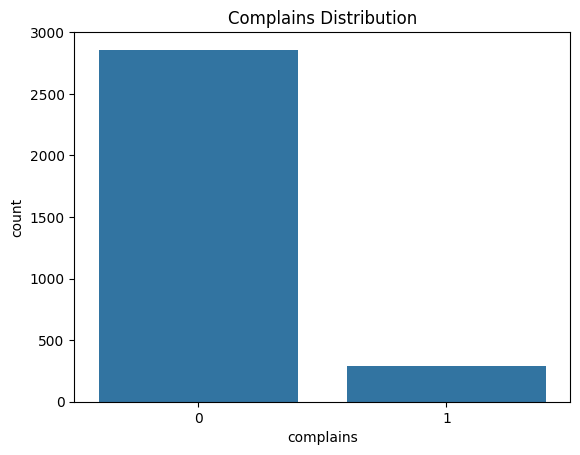

In [17]:
#Visualizing the complains Distribution
sns.countplot(x='complains', data=df_clean)
plt.title('Complains Distribution')
plt.show()


The plot clearly shows how many users had complaints versus those who didn’t, helping identify any class imbalance in this binary feature.

### Cleaning the 'subscription_length' Feature

In [18]:
data_cleaning('subscription_length')

### Analyzing 'subscription_length' ###

Missing values: 6

Unique Values:
[-38.      39.      37.      38.          nan -37.      33.      36.
  34.      35.      31.      26.      27.      25.      17.      15.
  16.       9.      40.      41.     -40.      39.001   29.      28.
  20.      19.      18.      11.      36.0009  32.      24.      23.
  13.      14.       7.      42.      43.      30.      22.      21.
  12.       5.      44.      45.      10.       3.       6.       8.
   4.     -35.      46.      47.    ]

Their Counts:
subscription_length
 36.0000    275
 38.0000    256
 37.0000    225
 35.0000    225
 34.0000    201
 39.0000    198
 40.0000    182
 33.0000    152
 32.0000    121
 41.0000    110
 31.0000    104
 42.0000     80
 30.0000     80
 29.0000     73
 28.0000     59
 43.0000     56
 27.0000     56
 25.0000     52
 26.0000     45
 44.0000     44
 24.0000     40
 23.0000     39
 17.0000     32
 15.0000     31
 18.0000     30
 16.0000     30
 19.0000     29
 20.00

In [19]:
df_clean['subscription_length'] = df_clean['subscription_length'].abs()
df_clean['subscription_length'] = df_clean['subscription_length'].fillna(df_clean['subscription_length'].mean())
df_clean['subscription_length'] = df_clean['subscription_length'].astype(int)


"Negative values in the 'subscription_length' column were first converted to their absolute values to ensure logical consistency. Then, missing values were imputed with the column mean."


In [20]:
result_cleaning('subscription_length')

na_number = 0
[38 39 37 32 33 36 34 35 31 26 27 25 17 15 16  9 40 41 29 28 20 19 18 11
 24 23 13 14  7 42 43 30 22 21 12  5 44 45 10  3  6  8  4 46 47]
count    3150.000000
mean       32.544444
std         8.565724
min         3.000000
25%        30.000000
50%        35.000000
75%        38.000000
max        47.000000
Name: subscription_length, dtype: float64
type of column: int64


### Cleaning the 'charge_amount' Feature

In [21]:
data_cleaning('charge_amount')

### Analyzing 'charge_amount' ###

Missing values: 2

Unique Values:
['0' '-1' '2' '1' '-3' 'OOO' '8' '3' '4' '9' '7' '5' '10' '6' '-9' 'o'
 '2.00001' 'o0' 'o1' 'o2' 'o3' 'o4' 'o5' 'o6' 'o7' 'o8' nan 'OO']

Their Counts:
charge_amount
0          1755
1           616
2           393
3           198
4            76
5            30
8            19
7            14
9            13
6            11
10            7
-3            1
OOO           1
-1            1
-9            1
o             1
2.00001       1
o0            1
o1            1
o2            1
o3            1
o4            1
o5            1
o6            1
o7            1
o8            1
OO            1
Name: count, dtype: int64
Type: object

--------------------------------------------------



In [22]:
#Replace incorrect values with correct values

df_clean['charge_amount'] = df_clean['charge_amount'].replace(['OOO','OO','0','o','o0'], 0 )
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['o1'], 1)
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['o7'], 7 )
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['o2'], 2)
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['o4'], 4 )
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['o8'], 8 )
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['o5'], 5 )
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['o3'], 3)
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['o6'], 6 )
df_clean['charge_amount'] = df_clean['charge_amount'].replace(['2.00001'], 2 )

In [23]:
df_clean['charge_amount'] = df_clean['charge_amount'].fillna(0).astype(int).abs()

charge_amount' column: incorrect values were corrected and NaN values were replaced with 0.

In [24]:
result_cleaning('charge_amount')

na_number = 0
[ 0  1  2  3  8  4  9  7  5 10  6]
count    3150.000000
mean        0.953651
std         1.535153
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        10.000000
Name: charge_amount, dtype: float64
type of column: int64


### Cleaning the 'seconds_of_use' Feature

In [25]:
data_cleaning('seconds_of_use')

### Analyzing 'seconds_of_use' ###

Missing values: 40

Unique Values:
['4370' nan '2453' ... '8527' '2447' '1082']

Their Counts:
seconds_of_use
0        131
305       37
1973       9
1015       9
710        9
        ... 
13368      1
1833       1
14735      1
2690       1
1082       1
Name: count, Length: 1764, dtype: int64
Type: object

--------------------------------------------------



In [26]:
df_clean['seconds_of_use'] = df_clean['seconds_of_use'].replace(['O3915'], 3915)
df_clean['seconds_of_use'] = pd.to_numeric(df_clean['seconds_of_use'], errors='coerce')
df_clean['seconds_of_use'] = df_clean['seconds_of_use'].abs()
df_clean['seconds_of_use'] = df_clean['seconds_of_use'].fillna(df_clean['seconds_of_use'].median())
df_clean['seconds_of_use'] = df_clean['seconds_of_use'].astype(int)


For cleaning the seconds_of_use column, the erroneous entry 'O3915' was corrected to 3915.
The column was then converted to numeric, negative values were replaced with their absolute values, and missing values were filled with the column median (to reduce the impact of potential outliers).

In [27]:
result_cleaning('seconds_of_use')

na_number = 0
[4370 3030 2453 ... 8527 2447 1082]
count     3150.000000
mean      4488.200000
std       4175.183592
min          0.000000
25%       1450.750000
50%       3030.000000
75%       6467.000000
max      17090.000000
Name: seconds_of_use, dtype: float64
type of column: int64


### Cleaning the 'frequency_of_use','frequency_of_sms','distinct_called_numbers' Feature

In [28]:
cols = list(df_clean.iloc[:,[5,6,7]].columns)
cols

['frequency_of_use', 'frequency_of_sms', 'distinct_called_numbers']

In [29]:
# Imputing mean values in place of null values
for c in cols:
    df_clean[c] = df_clean[c].abs()
    mean_column = df_clean[c].mean()
    df_clean[c] = df_clean[c].fillna(mean_column)
    df_clean[c] = df_clean[c].astype(int)

For the columns frequency_of_use, frequency_of_sms, and distinct_called_numbers, missing values were imputed with the mean of each column.
Additionally, negative values (likely due to data entry errors) were replaced with their absolute values, ensuring that all features remained consistent and non-negative.
Finally, the columns were converted to integer type for proper representation.


In [30]:
data_cleaning('frequency_of_use')

### Analyzing 'frequency_of_use' ###

Missing values: 0

Unique Values:
[ 71   5  60  66  58  82  39 121 169  83  95  54 225  27 182  86  14  69
 127 154  75  47  93  98  22  41  44   2  25  97   7   4 238 116  53  36
  10  32  61  26 141 171  45  40  19  74   8  63  85  42 124 172  57 228
  30 185  89  17   3 130 157  78  50  96 101  28 100 241 119  56  13  35
  64  29 144 174  48  43  68  55  79 118 166  80  92  51 222  24 179  11
 151  72  90  38   0  94 235 113  33  23 138 168  37  16  73  62  84 123
 227 184  88 129 156  77  49  46  99   9   6 240  12  34 143 173  21 167
  81  52 223 180 125 152  91  20 236 114  59 139  15  70  76 131 105 192
 137 164 103 108 107 248 126 181 111 159 215 117  65  31  87 106 161 177
 233 190 135 162 246  18 149 217 146  67 230 133 163 175 231 188 160 104
 244 122 147 115 219 176 148   1 232 110 165 170 226 183 128 155 239 142
 120 224 153 237 140 132 193 109 249 158 214 112 216 145 229 221 178 150
 234 186 102 242 209 211 213 220 136 218 134 187 243

In [31]:
data_cleaning('frequency_of_sms')


### Analyzing 'frequency_of_sms' ###

Missing values: 0

Unique Values:
[  5   7 359   1   2  32 285 144  73   8  54 483 150 186   0  13 384  11
 108  16  26   9  34  14   4 271  38 175 193  30  10  21  19  28  85  31
 215  12 364   6  37 290 149  59 488 155 191  18 389 113  39 276  43 180
 198  35  15  24  33  90  78  36 220 354  27 280 139   3  49 478 145 181
 379 103  29 266 170 188  25  23  80  68 210  17 369  42 295 154  64 493
 160 196 394 118  44 281  48 185 203  40  20  95  83  41 225 349  22 275
 134 473 140 176 374  98 261 165 183  75  63 205  47 300 159  69 498 201
 399 123 286  53 190 208  45 100  88  46 230 344 270 129 468 135 171  93
 256 178  70  58 200 370 296  65 494 161 197 395 119 282 204  96  84 226
 348 274 133 472 373  97 260 164 182  74  62 380 306 504 207 405  55 292
 214  51 106  94  52 236 338 264 462 363  87 250 172 194 391 317  86 515
 218 416  66 303  60 117 105 247 327 253 112 451 352  76 239 143 368 294
 153 492 195 393 184 202  82 224 350 474 141 177 375

In [32]:
data_cleaning('distinct_called_numbers')

### Analyzing 'distinct_called_numbers' ###

Missing values: 0

Unique Values:
[17  4 24 35 33  0 18 43 44 25 12 32  8 30 26 11 47 37 42 14 16 31  2  6
 22 80 28 20 23 68  7  3 13 40 19 10 45 46 27 34 49 39 82 70  9  5 15 41
 29 78 66  1 21 38 48 36 51 84 72 76 64 50 53 86 74 62 52 85 73 75 63 58
 59 57 95 83 55 65 71 77 79 67 81 69 60 61 56 93 88 54 87 97]

Their Counts:
distinct_called_numbers
0     155
2      88
10     78
15     77
6      76
     ... 
95      1
93      1
88      1
87      1
97      1
Name: count, Length: 92, dtype: int64
Type: int64

--------------------------------------------------



### Cleaning the 'customer_value' Feature

In [33]:
data_cleaning('customer_value')

### Analyzing 'customer_value' ###

Missing values: 93

Unique Values:
[ 197.64    46.035 1536.52  ...  261.21   280.32   100.68 ]

Their Counts:
customer_value
0.000       40
45.495      11
40.440      10
15.165       6
25.275       5
            ..
2022.885     1
42.390       1
36.315       1
964.160      1
1331.325     1
Name: count, Length: 2653, dtype: int64
Type: float64

--------------------------------------------------



In [34]:
df_clean['customer_value'] = df_clean['customer_value'].fillna(df_clean['customer_value'].median())

For the customer_value column, missing values were imputed with the median of the column to reduce the influence of potential outliers.
The column was kept as float64 to preserve its continuous nature.

In [35]:
result_cleaning('customer_value')

na_number = 0
[ 197.64    46.035 1536.52  ...  261.21   280.32   100.68 ]
count    3150.000000
mean      477.858073
std       512.234600
min         0.000000
25%       124.570000
50%       237.600000
75%       788.388750
max      2165.280000
Name: customer_value, dtype: float64
type of column: float64


# Overview Of Data

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   call_failure             3150 non-null   int64  
 1   complains                3150 non-null   int64  
 2   subscription_length      3150 non-null   int64  
 3   charge_amount            3150 non-null   int64  
 4   seconds_of_use           3150 non-null   int64  
 5   frequency_of_use         3150 non-null   int64  
 6   frequency_of_sms         3150 non-null   int64  
 7   distinct_called_numbers  3150 non-null   int64  
 8   tariff_plan              3150 non-null   int64  
 9   status                   3150 non-null   int64  
 10  age                      2909 non-null   float64
 11  customer_value           3150 non-null   float64
 12  churn                    3150 non-null   object 
dtypes: float64(2), int64(10), object(1)
memory usage: 320.1+ KB


In [37]:
df_clean.describe()

,call_failure,complains,subscription_length,charge_amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,tariff_plan,status,age,customer_value
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,2909.000000,3150.000000
mean,7.620952,0.092381,32.544444,0.953651,4488.200000,69.874921,73.267619,23.502222,1.077778,1.248254,30.996906,477.858073
std,7.267065,0.289609,8.565724,1.535153,4175.183592,57.159948,112.207217,17.222135,0.267864,0.432069,9.776719,512.234600
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-30.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1450.750000,28.000000,6.000000,10.000000,1.000000,1.000000,25.000000,124.570000
50%,6.000000,0.000000,35.000000,0.000000,3030.000000,54.000000,21.000000,21.000000,1.000000,1.000000,30.000000,237.600000
75%,12.000000,0.000000,38.000000,1.000000,6467.000000,95.000000,87.000000,34.000000,1.000000,1.000000,30.000000,788.388750
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,2.000000,2.000000,225.000000,2165.280000


After cleaning, the dataset contains 3,150 records and 13 features.
Most columns were fully cleaned, and missing values were imputed where necessary.

The age column required special treatment:

Values greater than 120 were assumed to be invalid and replaced with the median.

Negative values were converted to their absolute values.

All columns are now consistent in type and ready for further analysis or modeling.

### Negative entries in the 'Age' column should be identified and replaced with valid values

In [38]:
df_clean['age'] = df_clean['age'].abs() 

In [39]:
df_clean['age'].describe()

count    2909.000000
mean       31.017532
std         9.711061
min         0.000000
25%        25.000000
50%        30.000000
75%        30.000000
max       225.000000
Name: age, dtype: float64

In [40]:
df_clean['age'].value_counts().sort_index()

age
0.0         4
15.0      122
25.0      967
30.0     1287
45.0      365
55.0      163
225.0       1
Name: count, dtype: int64

In [41]:
median_age = df_clean.loc[(df_clean['age'] >0)&(df_clean['age'] <= 120) , 'age'].median()
df_clean.loc[(df_clean['age'] ==0)|(df_clean['age'] > 120), 'age'] = median_age
median_age

np.float64(30.0)

In [42]:
df_clean['age'].value_counts().sort_index()

age
15.0     122
25.0     967
30.0    1292
45.0     365
55.0     163
Name: count, dtype: int64

### boxplots for numeric columns to identify potential outlier values

Purpose:

This step helps visualize extreme values that may affect statistical analysis or modeling and supports decisions about whether further cleaning or transformation is needed.

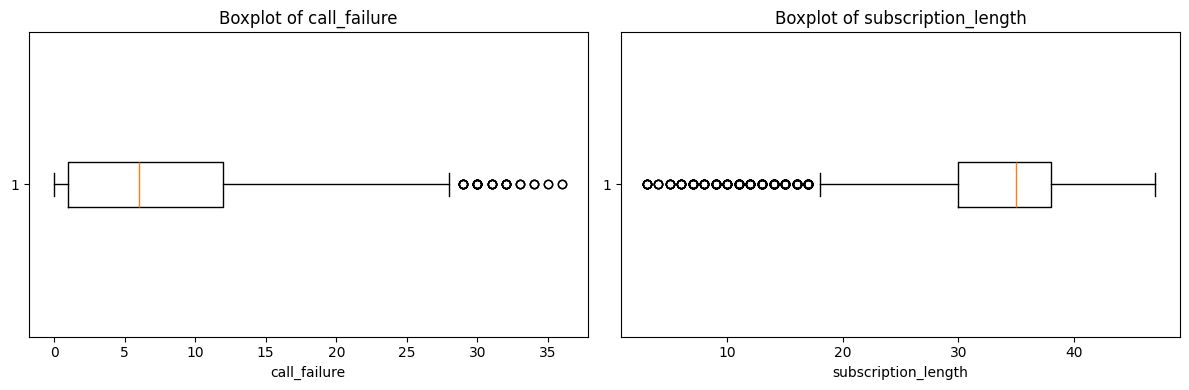

call_failure: 47 potential outliers
subscription_length: 282 potential outliers


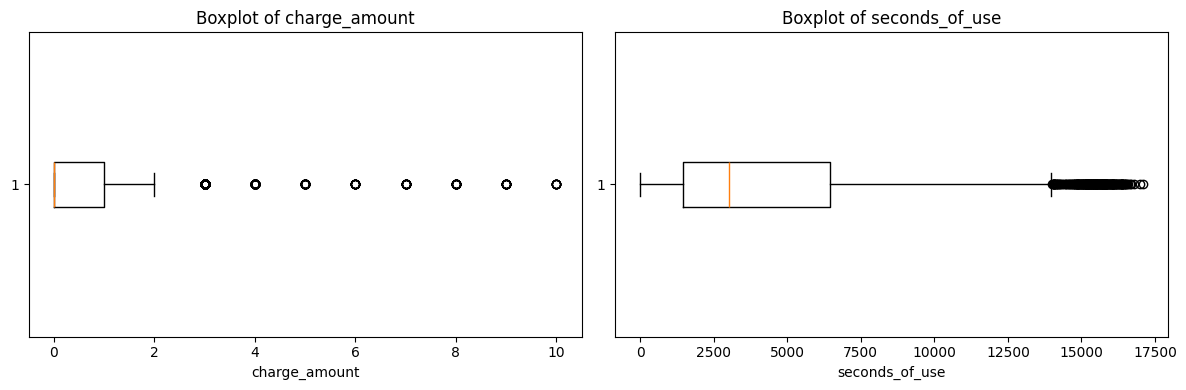

charge_amount: 376 potential outliers
seconds_of_use: 208 potential outliers


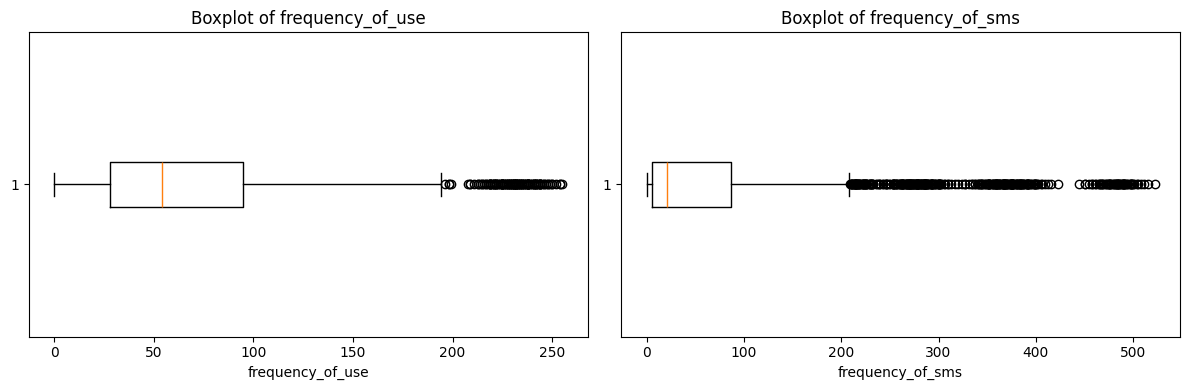

frequency_of_use: 130 potential outliers
frequency_of_sms: 368 potential outliers


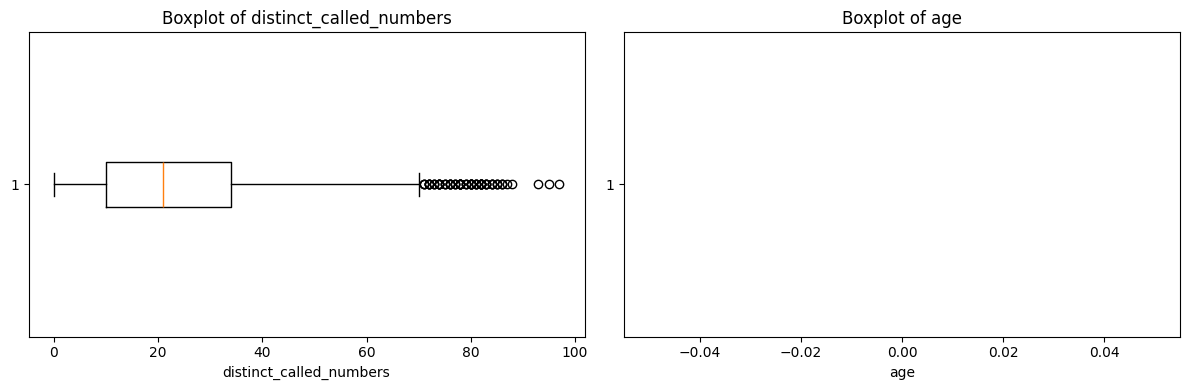

distinct_called_numbers: 77 potential outliers
age: 650 potential outliers


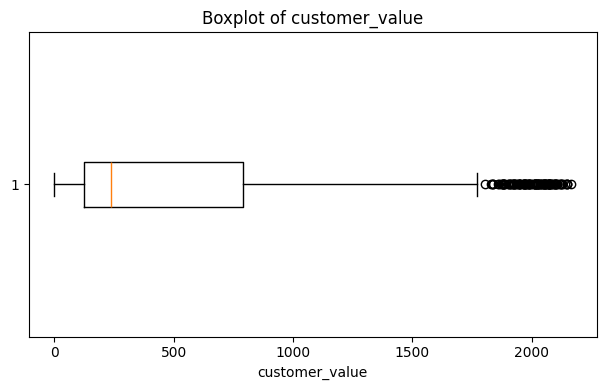

customer_value: 116 potential outliers


In [43]:
binary_cols = ['complains', 'tariff_plan', 'status', 'churn']

df_num = df_clean.drop(columns=binary_cols)

# two boxplot in one row
num_cols = len(df_num.columns)
for i in range(0, num_cols, 2):
    plt.figure(figsize=(12, 4))
    
    # first boxplot
    plt.subplot(1, 2, 1)
    col = df_num.columns[i]
    plt.boxplot(df_clean[col], vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    #  second boxplot
    if i+1 < num_cols:
        plt.subplot(1, 2, 2)
        col = df_num.columns[i+1]
        plt.boxplot(df_clean[col], vert=False)
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()
    
    # number of potential outlier
    for col in df_num.columns[i:i+2]:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        print(f"{col}: {outliers.shape[0]} potential outliers")


### Export the cleaned data to a CSV file

In [44]:
df_clean.to_csv('churn_final.csv',index = False)